# Compare pool metrics
Load all metrics parquets from `artifacts/` and compare MAE, RMSE, MAPE across models (baseline, prophet, prophet_xgb, chronos).

In [6]:
from pathlib import Path
import pandas as pd

ARTIFACTS_DIR = Path.cwd() / "artifacts"

files = {
    "baseline": "metrics_baseline_pool.parquet",
    "prophet": "metrics_prophet_pool.parquet",
    "prophet_xgb": "metrics_prophet_xgb_pool.parquet",
    "chronos": "metrics_chronos_pool.parquet",
}
dfs = []
for name, f in files.items():
    p = ARTIFACTS_DIR / f
    if p.exists():
        df = pd.read_parquet(p)
        dfs.append(df)
    else:
        print(f"Missing: {p}")

if not dfs:
    raise SystemExit("No metrics files found. Run 01–04 pool notebooks first.")
all_metrics = pd.concat(dfs, ignore_index=True)
print("Overall :")
overall = all_metrics[all_metrics["symbol"] == "overall"]
overall

Overall :


,model,symbol,MAE,RMSE,MAPE_%
7,baseline,overall,1743.840286,5095.420565,9.516772
15,prophet,overall,3296.251496,10068.169639,11.648050
23,prophet_xgb,overall,784.195129,2543.824607,3.798529
31,chronos,overall,676.834842,2052.802179,3.272248


In [7]:
# Pivot: rows = symbol (or overall), columns = model, values = MAE / RMSE / MAPE_%
for metric in ["MAE", "RMSE", "MAPE_%"]:
    if metric not in all_metrics.columns:
        continue
    pt = all_metrics.pivot_table(index="symbol", columns="model", values=metric)
    print(f"\n--- {metric} ---")
    print(pt.to_string())
    print()


--- MAE ---
model        baseline      chronos       prophet  prophet_xgb
symbol                                                       
AAPL        19.609135     7.969783     15.397031     6.916656
BTC-USD  11346.617432  4448.797135  22038.800661  5200.253236
ETH-USD    741.156682   248.480416    926.280578   239.619225
MSFT        29.190272    11.335902     41.723848    14.993584
NVDA        13.574884     5.769599      9.645319     6.805341
QQQ         28.793306     8.972439     22.340317    11.673870
SPY         27.940290     6.518620     19.572718     9.103990
overall   1743.840286   676.834842   3296.251496   784.195129


--- RMSE ---
model        baseline      chronos       prophet  prophet_xgb
symbol                                                       
AAPL        21.964702     9.893981     18.404163     8.844215
BTC-USD  13453.780824  5421.597027  26618.561264  6723.629154
ETH-USD    857.323500   322.026208   1012.195513   298.592810
MSFT        35.509242    15.110289     46.

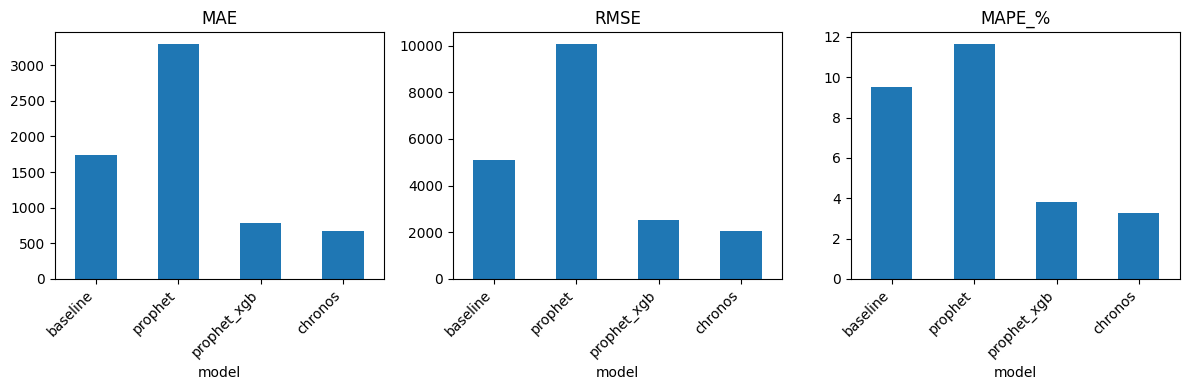

In [9]:
# Overall row only: bar comparison

if overall.empty:
    overall = all_metrics.groupby("model").agg({"MAE": "mean", "RMSE": "mean", "MAPE_%": "mean"}).reset_index()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, col in zip(axes, ["MAE", "RMSE", "MAPE_%"]):
    if col in overall.columns:
        overall.plot(x="model", y=col, kind="bar", ax=ax, legend=False)
        ax.set_title(col)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()